### Problem Statement:- Predict the percentage of an student based on the no. of study hours.

- Name:- Aditya Rai

In [1]:
# Importing the Libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error

%matplotlib inline

In [2]:
dataset = pd.read_csv("D:/Dataset/student_score.csv")

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# There is no null values in the dataset

dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

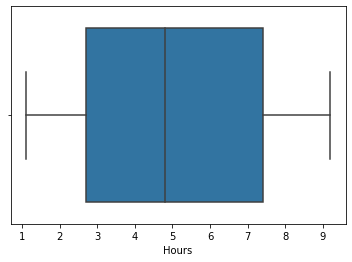

In [6]:
# There is no ouliers in the feature

g = sns.boxplot(x = dataset["Hours"])

In [7]:
X = dataset.iloc[:,:-1] # independent feature
Y = dataset.iloc[:,-1] # dependent feature

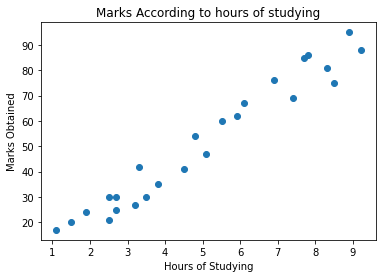

In [8]:
# Using scatter plot we can see that the feature and the target are linearly distributed

fig,ax = plt.subplots()
ax.scatter(X,Y)
ax.set_xlabel("Hours of Studying")
ax.set_ylabel("Marks Obtained")
ax.set_title("Marks According to hours of studying")
plt.show()

In [9]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [10]:
Y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [11]:
# Making a Object of the Linear Regression

linreg = LinearRegression()

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 0)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [14]:
linreg.fit(X_train,Y_train)

LinearRegression()

In [15]:
print(linreg.intercept_)
print(linreg.coef_)

2.018160041434662
[9.91065648]


In [16]:
# Best fit line equation

Y0 = linreg.intercept_ + linreg.coef_*X_train

In [17]:
Y0.head()

,Hours
22,39.678655
17,20.848407
24,79.321281
23,70.401690
14,12.919882


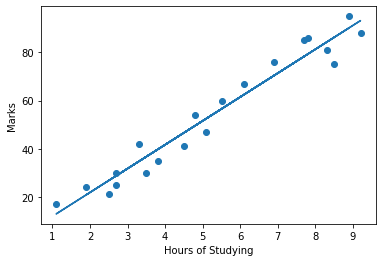

In [18]:
# Plotting our best fit line with the scatter plot of the Training data

fig,ax = plt.subplots()
ax.scatter(X_train,Y_train)
ax.plot(X_train,Y0)
ax.set_xlabel("Hours of Studying")
ax.set_ylabel("Marks")
plt.show()

In [19]:
# Predicting the value using the test data

Y_pred = linreg.predict(X_test)

In [20]:
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
Predicted = pd.DataFrame({"Actual":Y_test ,"Prediction": Y_pred})

In [22]:
Predicted

,Actual,Prediction
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [23]:
# Now Checking the accuracy of the model

metrics.r2_score(Y_pred,Y_test)

0.9546785947197246

In [24]:
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
absmse = np.abs(rmse)

In [25]:
print(mse)
print(rmse)
print(absmse)

21.598769307217456
4.647447612100373
4.647447612100373


In [30]:
# Predicting a uset input value

hours = int(input("Enter the number of hours :"))
predicted_score = linreg.predict([[hours]])
print("If the student study for {} hours then he can score {} marks".format(hours , predicted_score ))


Enter the number of hours :9
If the student study for 9 hours then he can score [91.21406837] marks
